# amazon product review

In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [28]:
url = 'https://www.amazon.in/HP-15s-11th-Micro-Edge-Anti-Glare-Graphics/dp/B09S9XKXDM/ref=cm_cr_arp_d_product_top?ie=UTF8&th=1'

In [29]:
HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.67 Safari/537.36','Accept-Language': 'en-US, en;q=0.5'})

In [30]:
def getdata(url):
    r = requests.get(url, headers=HEADERS)
    return r.text

In [31]:
def html_code(url):
    htmldata = getdata(url)
    soup = BeautifulSoup(htmldata, 'html.parser')
    return (soup)

In [32]:
def cus_rev(soup):
    data_str = ""
  
    for item in soup.find_all("div", class_="a-expander-content reviewText review-text-content a-expander-partial-collapse-content"):
        data_str = data_str + item.get_text()
  
    result = data_str.split("\n")
    return (result)

In [33]:
soup = html_code(url)

In [34]:
rev_data = cus_rev(soup)
rev_result = []
for i in rev_data:
    if i == "":
        pass
    else:
        rev_result.append(i)

In [35]:
url2='https://www.amazon.in/HP-15s-11th-Micro-Edge-Anti-Glare-Graphics/product-reviews/B09S9XKXDM/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2'

In [36]:
soup2 = html_code(url2)

In [37]:
def cus_rev2(soup2):
    data_str = ""
  
    for item in soup2.find_all("div", class_="a-row a-spacing-small review-data"):
        data_str = data_str + item.get_text()
  
    result = data_str.split("\n")
    return (result)

In [38]:
rev_data = cus_rev2(soup2)
for i in rev_data:
    if i == "":
        pass
    else:
        rev_result.append(i)

In [39]:
for i in range(3,21):
    url = 'https://www.amazon.in/HP-15s-11th-Micro-Edge-Anti-Glare-Graphics/product-reviews/B09S9XKXDM/ref=cm_cr_getr_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    soup = html_code(url)
    rev_data = cus_rev2(soup)
    for i in rev_data:
        if i == "":
            pass
        else:
            rev_result.append(i)

In [40]:
 len(rev_result)

212

In [41]:
data = {'Reviews': rev_result}
df = pd.DataFrame(data)
df.to_csv('amazon_review.csv')

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy

%matplotlib inline

In [122]:
reviews = pd.read_csv('amazon_review.csv',index_col=0)

In [123]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 211
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  212 non-null    object
dtypes: object(1)
memory usage: 3.3+ KB


In [124]:
#pd.set_option('display.max_rows', None)

In [125]:
reviews

,Reviews
0,"In specification, mentioned 4 1 Ghz processes..."
1,"While setting up the laptop, screen went wonky..."
2,"Speaker is buzzing, new laptop, out of the box..."
3,It's a awsm laptop with premium looks and grea...
4,It was good just for 7 days post delivery. I a...
5,"Hi,I am totally disappointed with this purchas..."
6,Horrible experience! First there was flinch in...
7,I bought HP15s fr 2006tu it was delivered on 2...
8,Print on the keyboard keys is thin(font size a...
9,If looking for performance this laptop has bes...


In [126]:
for i in range(len(reviews)):
    text = reviews.loc[i,'Reviews']
    reviews.loc[i,'Reviews'] = text.strip()

In [127]:
reviews = reviews[reviews['Reviews'] != '']

In [128]:
reviews = reviews[reviews['Reviews'] != 'The media could not be loaded.']

In [129]:
reviews

,Reviews
0,"In specification, mentioned 4 1 Ghz processes..."
1,"While setting up the laptop, screen went wonky..."
2,"Speaker is buzzing, new laptop, out of the box..."
3,It's a awsm laptop with premium looks and grea...
4,It was good just for 7 days post delivery. I a...
5,"Hi,I am totally disappointed with this purchas..."
6,Horrible experience! First there was flinch in...
7,I bought HP15s fr 2006tu it was delivered on 2...
8,Print on the keyboard keys is thin(font size a...
9,If looking for performance this laptop has bes...


In [130]:
reviews.reset_index(drop=True,inplace=True)

In [131]:
reviews

,Reviews
0,"In specification, mentioned 4 1 Ghz processes..."
1,"While setting up the laptop, screen went wonky..."
2,"Speaker is buzzing, new laptop, out of the box..."
3,It's a awsm laptop with premium looks and grea...
4,It was good just for 7 days post delivery. I a...
5,"Hi,I am totally disappointed with this purchas..."
6,Horrible experience! First there was flinch in...
7,I bought HP15s fr 2006tu it was delivered on 2...
8,Print on the keyboard keys is thin(font size a...
9,If looking for performance this laptop has bes...


In [158]:
tweets = reviews.to_string(index=False,header=False)

In [159]:
tweets

'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [160]:
tweets = tweets.replace('\n','')

In [161]:
tweets

'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [173]:
from nltk.tokenize import word_tokenize

In [174]:
tokens = word_tokenize(tweets)

In [176]:
print(tokens)

['In', 'specification', ',', 'mentioned', '4', '1', 'Ghz', 'processes', 'but', 'I', 'received', '3.0', 'GHz', 'processor', '.', 'It', 'is', 'a', 'cheating', '.', 'Seller', 'take', 'money', 'for', 'high', 'configuration', 'and', 'provide', 'low', 'configuration', '😥', 'While', 'setting', 'up', 'the', 'laptop', ',', 'screen', 'went', 'wonky', '...', 'total', 'colour', 'distortion', 'and', 'hung', 'up', '.', 'Have', 'asked', 'replacement', '....', 'do', "n't", 'know', 'if', 'it', "'s", 'worth', 'buying', 'Speaker', 'is', 'buzzing', ',', 'new', 'laptop', ',', 'out', 'of', 'the', 'boxEdit', ':', 'The', 'replacement', 'laptop', 'speaker', 'is', 'the', 'same', '.', 'You', 'wo', "n't", 'hear', 'the', 'buzzing', 'while', 'listening', 'to', 'a', 'song', 'or', 'video', 'however', 'while', 'increasing', 'or', 'decreasing', 'system', 'volume', ',', 'the', 'chimes', 'crack', ',', 'also', 'for', 'Windows', 'pop', 'ups', ',', 'the', 'chime', 'sound', 'cracks', 'at', 'more', 'than', '50', '%', 'volume'

In [177]:
tweets_tokens_text=' '.join(tokens)
tweets_tokens_text

"In specification , mentioned 4 1 Ghz processes but I received 3.0 GHz processor . It is a cheating . Seller take money for high configuration and provide low configuration 😥 While setting up the laptop , screen went wonky ... total colour distortion and hung up . Have asked replacement .... do n't know if it 's worth buying Speaker is buzzing , new laptop , out of the boxEdit : The replacement laptop speaker is the same . You wo n't hear the buzzing while listening to a song or video however while increasing or decreasing system volume , the chimes crack , also for Windows pop ups , the chime sound cracks at more than 50 % volume . Really weird issue . It 's a awsm laptop with premium looks and great performance . It was good just for 7 days post delivery . I am not sure if i made a mistake buying it online . Laptop stopped working on 8th day and i had no option to place a request for replacement . I called customer service of HP they said within 48 hrs technician should visit and it 

In [178]:
import string
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'In specification  mentioned 4 1 Ghz processes but I received 30 GHz processor  It is a cheating  Seller take money for high configuration and provide low configuration 😥 While setting up the laptop  screen went wonky  total colour distortion and hung up  Have asked replacement  do nt know if it s worth buying Speaker is buzzing  new laptop  out of the boxEdit  The replacement laptop speaker is the same  You wo nt hear the buzzing while listening to a song or video however while increasing or decreasing system volume  the chimes crack  also for Windows pop ups  the chime sound cracks at more than 50  volume  Really weird issue  It s a awsm laptop with premium looks and great performance  It was good just for 7 days post delivery  I am not sure if i made a mistake buying it online  Laptop stopped working on 8th day and i had no option to place a request for replacement  I called customer service of HP they said within 48 hrs technician should visit and it s been more than 48 hrs and i h

In [179]:
text_tokens=word_tokenize(no_punc_text)
print(text_tokens)

['In', 'specification', 'mentioned', '4', '1', 'Ghz', 'processes', 'but', 'I', 'received', '30', 'GHz', 'processor', 'It', 'is', 'a', 'cheating', 'Seller', 'take', 'money', 'for', 'high', 'configuration', 'and', 'provide', 'low', 'configuration', '😥', 'While', 'setting', 'up', 'the', 'laptop', 'screen', 'went', 'wonky', 'total', 'colour', 'distortion', 'and', 'hung', 'up', 'Have', 'asked', 'replacement', 'do', 'nt', 'know', 'if', 'it', 's', 'worth', 'buying', 'Speaker', 'is', 'buzzing', 'new', 'laptop', 'out', 'of', 'the', 'boxEdit', 'The', 'replacement', 'laptop', 'speaker', 'is', 'the', 'same', 'You', 'wo', 'nt', 'hear', 'the', 'buzzing', 'while', 'listening', 'to', 'a', 'song', 'or', 'video', 'however', 'while', 'increasing', 'or', 'decreasing', 'system', 'volume', 'the', 'chimes', 'crack', 'also', 'for', 'Windows', 'pop', 'ups', 'the', 'chime', 'sound', 'cracks', 'at', 'more', 'than', '50', 'volume', 'Really', 'weird', 'issue', 'It', 's', 'a', 'awsm', 'laptop', 'with', 'premium', '

In [180]:
from nltk.corpus import stopwords

my_stop_words=stopwords.words('english')
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['In', 'specification', 'mentioned', '4', '1', 'Ghz', 'processes', 'I', 'received', '30', 'GHz', 'processor', 'It', 'cheating', 'Seller', 'take', 'money', 'high', 'configuration', 'provide', 'low', 'configuration', '😥', 'While', 'setting', 'laptop', 'screen', 'went', 'wonky', 'total', 'colour', 'distortion', 'hung', 'Have', 'asked', 'replacement', 'nt', 'know', 'worth', 'buying', 'Speaker', 'buzzing', 'new', 'laptop', 'boxEdit', 'The', 'replacement', 'laptop', 'speaker', 'You', 'wo', 'nt', 'hear', 'buzzing', 'listening', 'song', 'video', 'however', 'increasing', 'decreasing', 'system', 'volume', 'chimes', 'crack', 'also', 'Windows', 'pop', 'ups', 'chime', 'sound', 'cracks', '50', 'volume', 'Really', 'weird', 'issue', 'It', 'awsm', 'laptop', 'premium', 'looks', 'great', 'performance', 'It', 'good', '7', 'days', 'post', 'delivery', 'I', 'sure', 'made', 'mistake', 'buying', 'online', 'Laptop', 'stopped', 'working', '8th', 'day', 'option', 'place', 'request', 'replacement', 'I', 'called', 

In [181]:
len(text_tokens)

7447

In [182]:
len(no_stop_tokens)

4640

In [183]:
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words)

['in', 'specification', 'mentioned', '4', '1', 'ghz', 'processes', 'i', 'received', '30', 'ghz', 'processor', 'it', 'cheating', 'seller', 'take', 'money', 'high', 'configuration', 'provide', 'low', 'configuration', '😥', 'while', 'setting', 'laptop', 'screen', 'went', 'wonky', 'total', 'colour', 'distortion', 'hung', 'have', 'asked', 'replacement', 'nt', 'know', 'worth', 'buying', 'speaker', 'buzzing', 'new', 'laptop', 'boxedit', 'the', 'replacement', 'laptop', 'speaker', 'you', 'wo', 'nt', 'hear', 'buzzing', 'listening', 'song', 'video', 'however', 'increasing', 'decreasing', 'system', 'volume', 'chimes', 'crack', 'also', 'windows', 'pop', 'ups', 'chime', 'sound', 'cracks', '50', 'volume', 'really', 'weird', 'issue', 'it', 'awsm', 'laptop', 'premium', 'looks', 'great', 'performance', 'it', 'good', '7', 'days', 'post', 'delivery', 'i', 'sure', 'made', 'mistake', 'buying', 'online', 'laptop', 'stopped', 'working', '8th', 'day', 'option', 'place', 'request', 'replacement', 'i', 'called', 

In [184]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['in', 'specif', 'mention', '4', '1', 'ghz', 'process', 'i', 'receiv', '30', 'ghz', 'processor', 'it', 'cheat', 'seller', 'take', 'money', 'high', 'configur', 'provid', 'low', 'configur', '😥', 'while', 'set', 'laptop', 'screen', 'went', 'wonki', 'total', 'colour', 'distort', 'hung', 'have', 'ask', 'replac', 'nt', 'know', 'worth', 'buy', 'speaker', 'buzz', 'new', 'laptop', 'boxedit', 'the', 'replac', 'laptop', 'speaker', 'you', 'wo', 'nt', 'hear', 'buzz', 'listen', 'song', 'video', 'howev', 'increas', 'decreas', 'system', 'volum', 'chime', 'crack', 'also', 'window', 'pop', 'up', 'chime', 'sound', 'crack', '50', 'volum', 'realli', 'weird', 'issu', 'it', 'awsm', 'laptop', 'premium', 'look', 'great', 'perform', 'it', 'good', '7', 'day', 'post', 'deliveri', 'i', 'sure', 'made', 'mistak', 'buy', 'onlin', 'laptop', 'stop', 'work', '8th', 'day', 'option', 'place', 'request', 'replac', 'i', 'call', 'custom', 'servic', 'hp', 'said', 'within', '48', 'hr', 'technician', 'visit', '48', 'hr', 'even'

In [185]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

in specification mentioned 4 1 ghz processes i received 30 ghz processor it cheating seller take money high configuration provide low configuration 😥 while setting laptop screen went wonky total colour distortion hung have asked replacement nt know worth buying speaker buzzing new laptop boxedit the replacement laptop speaker you wo nt hear buzzing listening song video however increasing decreasing system volume chimes crack also windows pop ups chime sound cracks 50 volume really weird issue it awsm laptop premium looks great performance it good 7 days post delivery i sure made mistake buying online laptop stopped working 8th day option place request replacement i called customer service hp said within 48 hrs technician visit 48 hrs even received call i spent rs 42k work home work hampering also cpu turns display did troubleshooting improvement new gen hp laptopon 27th hp sent engineer ready help howver case pending 16th april amazon mention serial num invoice pslip hp needs invoice s

In [186]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['in', 'specification', 'mention', '4', '1', 'ghz', 'process', 'I', 'receive', '30', 'ghz', 'processor', 'it', 'cheat', 'seller', 'take', 'money', 'high', 'configuration', 'provide', 'low', 'configuration', '😥', 'while', 'set', 'laptop', 'screen', 'go', 'wonky', 'total', 'colour', 'distortion', 'hang', 'have', 'ask', 'replacement', 'not', 'know', 'worth', 'buy', 'speaker', 'buzz', 'new', 'laptop', 'boxedit', 'the', 'replacement', 'laptop', 'speaker', 'you', 'will', 'not', 'hear', 'buzzing', 'listening', 'song', 'video', 'however', 'increase', 'decrease', 'system', 'volume', 'chime', 'crack', 'also', 'window', 'pop', 'up', 'chime', 'sound', 'crack', '50', 'volume', 'really', 'weird', 'issue', 'it', 'awsm', 'laptop', 'premium', 'look', 'great', 'performance', 'it', 'good', '7', 'day', 'post', 'delivery', 'I', 'sure', 'make', 'mistake', 'buy', 'online', 'laptop', 'stop', 'work', '8th', 'day', 'option', 'place', 'request', 'replacement', 'I', 'call', 'customer', 'service', 'hp', 'say', 'wi

In [187]:
clean_tweets=' '.join(lemmas)
clean_tweets

"in specification mention 4 1 ghz process I receive 30 ghz processor it cheat seller take money high configuration provide low configuration 😥 while set laptop screen go wonky total colour distortion hang have ask replacement not know worth buy speaker buzz new laptop boxedit the replacement laptop speaker you will not hear buzzing listening song video however increase decrease system volume chime crack also window pop up chime sound crack 50 volume really weird issue it awsm laptop premium look great performance it good 7 day post delivery I sure make mistake buy online laptop stop work 8th day option place request replacement I call customer service hp say within 48 hrs technician visit 48 hrs even receive call I spend rs 42k work home work hampering also cpu turn display do troubleshoot improvement new gen hp laptopon 27th hp send engineer ready help howver case pende 16th april amazon mention serial num invoice pslip hp need invoice serial number I much disappointed stick two big b

In [188]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [189]:
print(cv.vocabulary_)

{'in': 622, 'specification': 1143, 'mention': 764, 'ghz': 531, 'process': 949, 'receive': 996, '30': 33, 'processor': 951, 'it': 658, 'cheat': 255, 'seller': 1070, 'take': 1195, 'money': 787, 'high': 583, 'configuration': 293, 'provide': 965, 'low': 735, 'while': 1316, 'set': 1082, 'laptop': 686, 'screen': 1055, 'go': 534, 'wonky': 1334, 'total': 1235, 'colour': 273, 'distortion': 385, 'hang': 559, 'have': 568, 'ask': 134, 'replacement': 1018, 'not': 819, 'know': 680, 'worth': 1342, 'buy': 219, 'speaker': 1139, 'buzz': 222, 'new': 809, 'boxedit': 205, 'the': 1208, 'you': 1356, 'will': 1324, 'hear': 575, 'buzzing': 223, 'listening': 718, 'song': 1132, 'video': 1281, 'however': 592, 'increase': 627, 'decrease': 344, 'system': 1193, 'volume': 1289, 'chime': 258, 'crack': 321, 'also': 100, 'window': 1325, 'pop': 919, 'up': 1255, 'sound': 1136, '50': 54, 'really': 994, 'weird': 1308, 'issue': 650, 'awsm': 157, 'premium': 931, 'look': 727, 'great': 548, 'performance': 892, 'good': 536, 'day'

In [190]:
print(cv.get_feature_names())

['0100sound', '10', '100', '10th', '10yrs', '10yrsno', '11', '11gen', '11th', '12', '13', '14', '14days', '15', '156inches', '16th', '18', '19', '1fan', '2006', '2006tu', '2019', '21', '23rd', '24', '25k', '2666mhz', '27032021when', '27th', '28', '2842021', '29th', '2nd', '30', '3040', '3200mhz', '335hour', '34hr', '3ghz', '3hrs', '3poor', '40', '41999', '41ghz', '42k', '42ki', '45', '45k', '48', '4gbps', '4hrs', '4hrsi', '4k', '4th', '50', '50000', '50k', '50mbps', '512', '56', '56hrs', '57', '5hrs', '5k', '60fps', '67', '7th', '8th', '9500', '9genbut', '9month', 'able', 'academic', 'accept', 'access', 'accessory', 'account', 'action', 'activate', 'activation', 'active', 'actual', 'actually', 'ad', 'adapter', 'adaptor', 'add', 'additional', 'advantage', 'afer', 'afraid', 'after', 'ago', 'air', 'alexa', 'all', 'almost', 'along', 'alphabet', 'already', 'also', 'although', 'always', 'amaze', 'amazing', 'amazingdiliverd', 'amazon', 'among', 'amount', 'amountbase', 'an', 'and', 'another', 

In [191]:
print(tweetscv.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [192]:
print(tweetscv.toarray().shape)

(4661, 1360)


In [193]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [194]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['10', 'also', 'amazon', 'back', 'bad', 'battery', 'boot', 'box', 'build', 'but', 'buy', 'charge', 'class', 'come', 'customer', 'day', 'deliver', 'display', 'drive', 'due', 'even', 'face', 'fast', 'first', 'gb', 'get', 'go', 'good', 'great', 'hang', 'heat', 'heating', 'high', 'hour', 'hp', 'issue', 'it', 'key', 'keyboard', 'laptop', 'last', 'life', 'light', 'like', 'long', 'look', 'lot', 'make', 'mention', 'money', 'month', 'ms', 'nice', 'not', 'office', 'one', 'online', 'overall', 'performance', 'port', 'price', 'problem', 'processor', 'product', 'provide', 'purchase', 'quality', 'receive', 'replace', 'replacement', 'restart', 'return', 'review', 'say', 'screen', 'see', 'service', 'silver', 'sound', 'speed', 'ssd', 'start', 'still', 'support', 'system', 'take', 'the', 'this', 'time', 'use', 'value', 'very', 'warranty', 'week', 'weight', 'well', 'window', 'within', 'work', 'would']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [196]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['10', '11', '11th', '13', '18', '2019', '25k', '2666mhz', '2nd', '30', '45', '48', '4hrs', '4k', '50', '512', '67', '8th', 'able', 'accessory', 'account', 'activate', 'activation', 'actually', 'add', 'advantage', 'after', 'ago', 'all', 'almost', 'along', 'already', 'also', 'always', 'amazing', 'amazon', 'amount', 'and', 'another', 'antivirus', 'app', 'around', 'as', 'attend', 'automatically', 'average', 'awesome', 'back', 'backlit', 'backup', 'bad', 'bag', 'basic', 'battery', 'be', 'beautiful', 'big', 'bit', 'black', 'board', 'body', 'boot', 'box', 'brand', 'break', 'build', 'but', 'buy', 'call', 'camera', 'can', 'card', 'care', 'case', 'change', 'charge', 'charger', 'cheap', 'check', 'class', 'color', 'colour', 'come', 'compare', 'complete', 'computer', 'concern', 'config', 'configuration', 'connect', 'consider', 'contact', 'cool', 'core', 'cost', 'could', 'cpu', 'crash', 'customer', 'damage', 'day', 'deal', 'definitely', 'deliver', 'delivery', 'dell', 'design', 'device', 'disappoint

In [197]:
nlp=spacy.load('en_core_web_sm')
one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [198]:
for token in doc_block[100:200]:
    print(token,token.pos_) 

option NOUN
place NOUN
request NOUN
replacement NOUN
I PRON
call VERB
customer NOUN
service NOUN
hp PROPN
say VERB
within ADP
48 NUM
hrs NOUN
technician NOUN
visit NOUN
48 NUM
hrs NOUN
even ADV
receive VERB
call NOUN
I PRON
spend VERB
rs NOUN
42k NOUN
work NOUN
home NOUN
work NOUN
hampering NOUN
also ADV
cpu VERB
turn NOUN
display NOUN
do AUX
troubleshoot NOUN
improvement NOUN
new PROPN
gen PROPN
hp PROPN
laptopon NOUN
27th NOUN
hp PART
send VERB
engineer NOUN
ready ADJ
help NOUN
howver NOUN
case NOUN
pende VERB
16th ADJ
april PROPN
amazon NOUN
mention VERB
serial ADJ
num ADJ
invoice NOUN
pslip NOUN
hp PROPN
need PROPN
invoice NOUN
serial ADJ
number NOUN
I PRON
much ADV
disappointed ADJ
stick PROPN
two NUM
big ADJ
brand NOUN
good ADJ
machine NOUN
work NOUN
fine ADV
unlucky ADJ
may AUX
going VERB
to ADP
piss ADJ
sale NOUN
let VERB
see VERB
long ADV
wait VERB
obtain VERB
correct ADJ
invoice NOUN
hpnote NOUN
accept VERB
invoice PROPN
sr PROPN
number NOUN
mention VERB
hp PART
entertain VER

In [199]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['invoice', 'pslip', 'invoice', 'number', 'brand', 'machine', 'work', 'going', 'sale', 'let', 'see', 'wait', 'obtain', 'invoice', 'hpnote', 'accept', 'number', 'mention', 'entertain', 'disappoint', 'purchase', 'spend', 'amount', 'use', 'product', 'request', 'replacement', 'happen', 'reason', 'buy', 'laptop', 'son', 'study', 'purpose', 'sale', 'service', 'son', 'study', 'got', 'impact', 'item', 'day', 'problem', 'resolve', 'day', 'take', 'issue', 'immediation', 'action', 'resolve', 'issuethank', 'regard', 'kajamydeen', 't', 'experience', 'screen', 'talk', 'customer', 'service', 'hour', 'declare', 'replace', 'replace', 'laptop', 'day', 'speaker', 'go', 'start', 'produce', 'voice', 'realise', 'return', 'day', 'amazon', 'replace', 'contact', 'help', 'sit', 'hour', 'talk', 'explain', 'person', 'come', 'home', 'check', 'label', 'replace', 'say', 'amazon', 'pick', 'amazon', 'side', 'month', 'laptop', 'seal', 'keep', 'call', 'mail', 'response', '₹']


In [200]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [201]:
X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10]

,word,count
0,laptop,155
1,product,63
2,buy,49
3,use,46
4,work,41
5,day,38
6,issue,37
7,battery,37
8,quality,34
9,get,31


<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

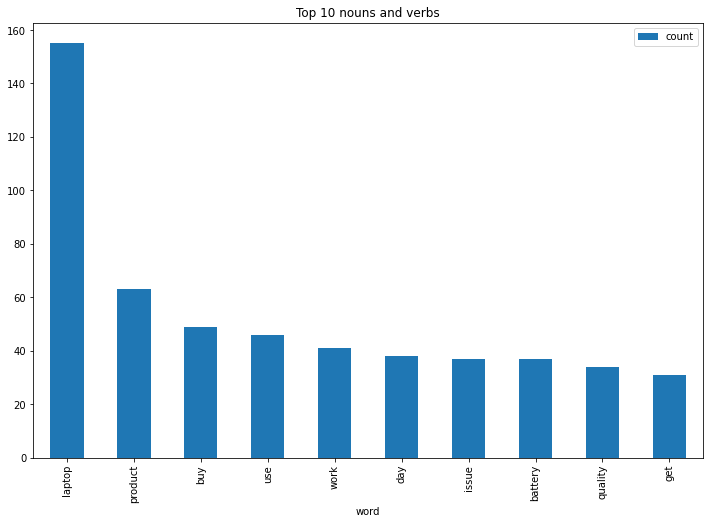

In [202]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [205]:
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [206]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [207]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [208]:
calculate_sentiment(text='great')

3

In [209]:
reviews['sentiment_value']=reviews['Reviews'].apply(calculate_sentiment)
reviews['sentiment_value']

0       0
1       2
2      -1
3       3
4       2
5      -1
6      -5
7       0
8      -1
9      15
10      0
11      1
12     58
13      7
14     20
15     -6
16      3
17      3
18     -2
19      1
20      2
21     17
22     14
23      2
24      5
25     -6
26     -2
27      1
28      0
29     -3
30     15
31      0
32     17
33      0
34      1
35      4
36      6
37      2
38     -1
39     26
40     -1
41      2
42     -4
43     -2
44      2
45     -1
46      7
47      1
48     -6
49      3
50     -4
51     -6
52      0
53     -3
54      6
55      3
56     -4
57      3
58      0
59     11
60     15
61      1
62     -1
63     15
64      9
65     -2
66      4
67      3
68     -6
69      8
70     -2
71      3
72      2
73      1
74     -2
75      1
76     17
77      5
78     -2
79      2
80      8
81     -3
82      9
83      6
84     -3
85      2
86     16
87     -5
88      8
89     12
90     -3
91     -1
92     -2
93      0
94      6
95      2
96     -7
97     -1
98      5
99      3


In [210]:
reviews['word_count']=reviews['Reviews'].str.split().apply(len)
reviews['word_count']

0       28
1       21
2       55
3       10
4      201
5       91
6      150
7       33
8       63
9      122
10      35
11      44
12     434
13     113
14     117
15      20
16      31
17      47
18      45
19     109
20      55
21     244
22     141
23      73
24     162
25      80
26      52
27      38
28     153
29      75
30      49
31     114
32      88
33      35
34      60
35     128
36      51
37      60
38      42
39     139
40      65
41      80
42     134
43      36
44      63
45      49
46      59
47      30
48      59
49      68
50      56
51     100
52      25
53      13
54      28
55      19
56      10
57      62
58      18
59      71
60      62
61      68
62      57
63      37
64      48
65      33
66      26
67      26
68      39
69      10
70      20
71      30
72       3
73      39
74       5
75      16
76      39
77      26
78      62
79      34
80      37
81      39
82      28
83      26
84      49
85      42
86      53
87      19
88      31
89      38
90      15

In [211]:
reviews.sort_values(by='sentiment_value')

,Reviews,sentiment_value,word_count
96,After I got six months later it's suddenly had...,-7,36
68,"Almost using this for 3 months now, use it 5 d...",-6,39
15,Product is very poor. Product finishing is ver...,-6,20
51,The product quality is really bad. Laptop's pl...,-6,100
48,Recently for my earlier pc (from hp itself) I ...,-6,59
121,It does not contain fingerprint sensor and bac...,-6,20
25,First my husband ordered a HP laptop from his ...,-6,80
87,Worst laptop..bought it two months back and it...,-5,19
110,Bad productAmozon overview discription is high...,-5,24
6,Horrible experience! First there was flinch in...,-5,150


In [212]:
reviews['sentiment_value'].describe()

count    196.000000
mean       2.770408
std        6.600182
min       -7.000000
25%       -0.250000
50%        2.000000
75%        4.250000
max       58.000000
Name: sentiment_value, dtype: float64

In [213]:
reviews[reviews['sentiment_value']<=0]

,Reviews,sentiment_value,word_count
0,"In specification, mentioned 4 1 Ghz processes...",0,28
2,"Speaker is buzzing, new laptop, out of the box...",-1,55
5,"Hi,I am totally disappointed with this purchas...",-1,91
6,Horrible experience! First there was flinch in...,-5,150
7,I bought HP15s fr 2006tu it was delivered on 2...,0,33
8,Print on the keyboard keys is thin(font size a...,-1,63
10,It seems this laptop has an inbuilt problem......,0,35
15,Product is very poor. Product finishing is ver...,-6,20
18,This laptop closed many times. Screen always g...,-2,45
25,First my husband ordered a HP laptop from his ...,-6,80


In [214]:
reviews[reviews['sentiment_value']>0]

,Reviews,sentiment_value,word_count
1,"While setting up the laptop, screen went wonky...",2,21
3,It's a awsm laptop with premium looks and grea...,3,10
4,It was good just for 7 days post delivery. I a...,2,201
9,If looking for performance this laptop has bes...,15,122
11,"Bought it for 41999, so far haven't faced any ...",1,44
12,I am writing this review after using this lapt...,58,434
13,I made this review after using this laptop for...,7,113
14,I am working with i5 & i7 laptops and this is ...,20,117
16,This computer hanged on first day... I had to ...,3,31
17,I am using from last few days. Every thing is ...,3,47


In [216]:
reviews['index']=range(0,len(reviews))
reviews

,Reviews,sentiment_value,word_count,index
0,"In specification, mentioned 4 1 Ghz processes...",0,28,0
1,"While setting up the laptop, screen went wonky...",2,21,1
2,"Speaker is buzzing, new laptop, out of the box...",-1,55,2
3,It's a awsm laptop with premium looks and grea...,3,10,3
4,It was good just for 7 days post delivery. I a...,2,201,4
5,"Hi,I am totally disappointed with this purchas...",-1,91,5
6,Horrible experience! First there was flinch in...,-5,150,6
7,I bought HP15s fr 2006tu it was delivered on 2...,0,33,7
8,Print on the keyboard keys is thin(font size a...,-1,63,8
9,If looking for performance this laptop has bes...,15,122,9


<AxesSubplot:xlabel='sentiment_value', ylabel='Count'>

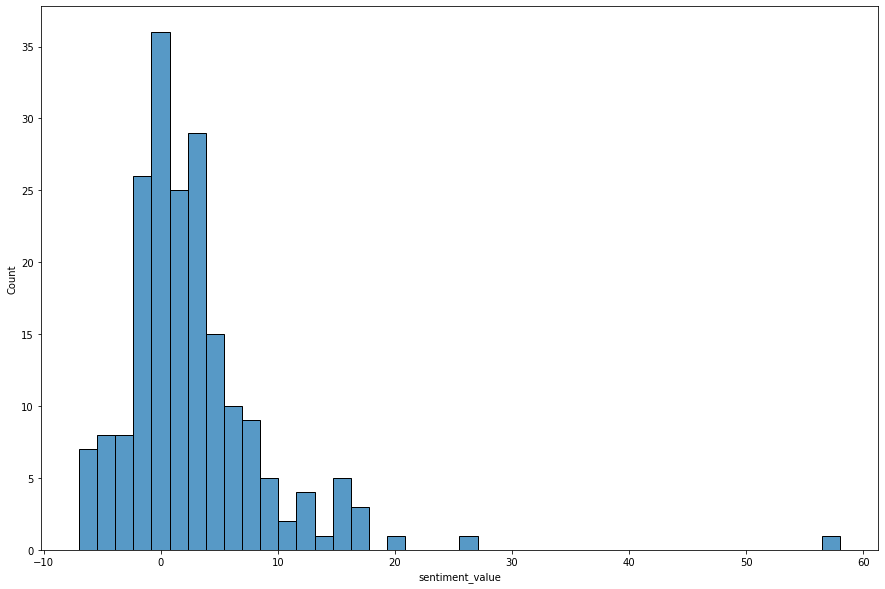

In [217]:
import seaborn as sns

plt.figure(figsize=(15,10))
sns.histplot(reviews['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

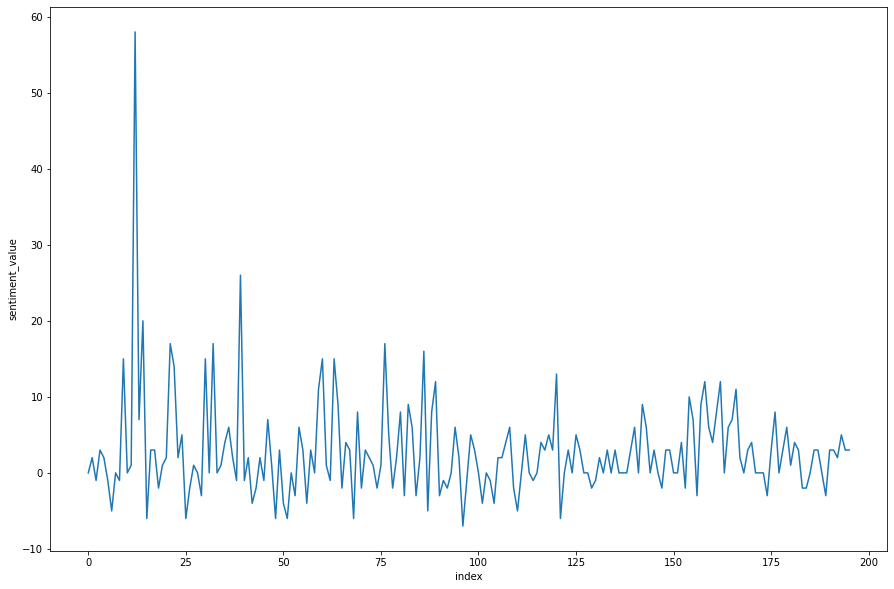

In [218]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=reviews)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

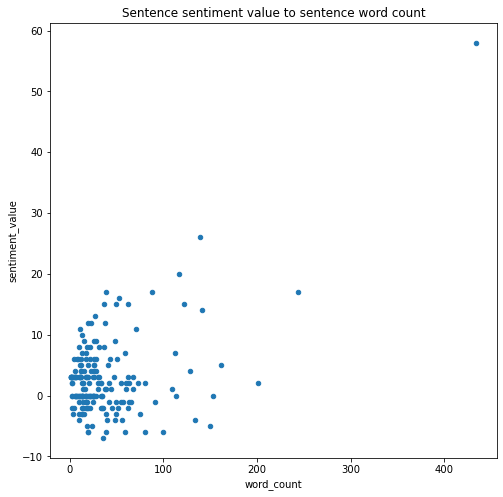

In [219]:
reviews.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence sentiment value to sentence word count')

In [220]:
from wordcloud import WordCloud, STOPWORDS

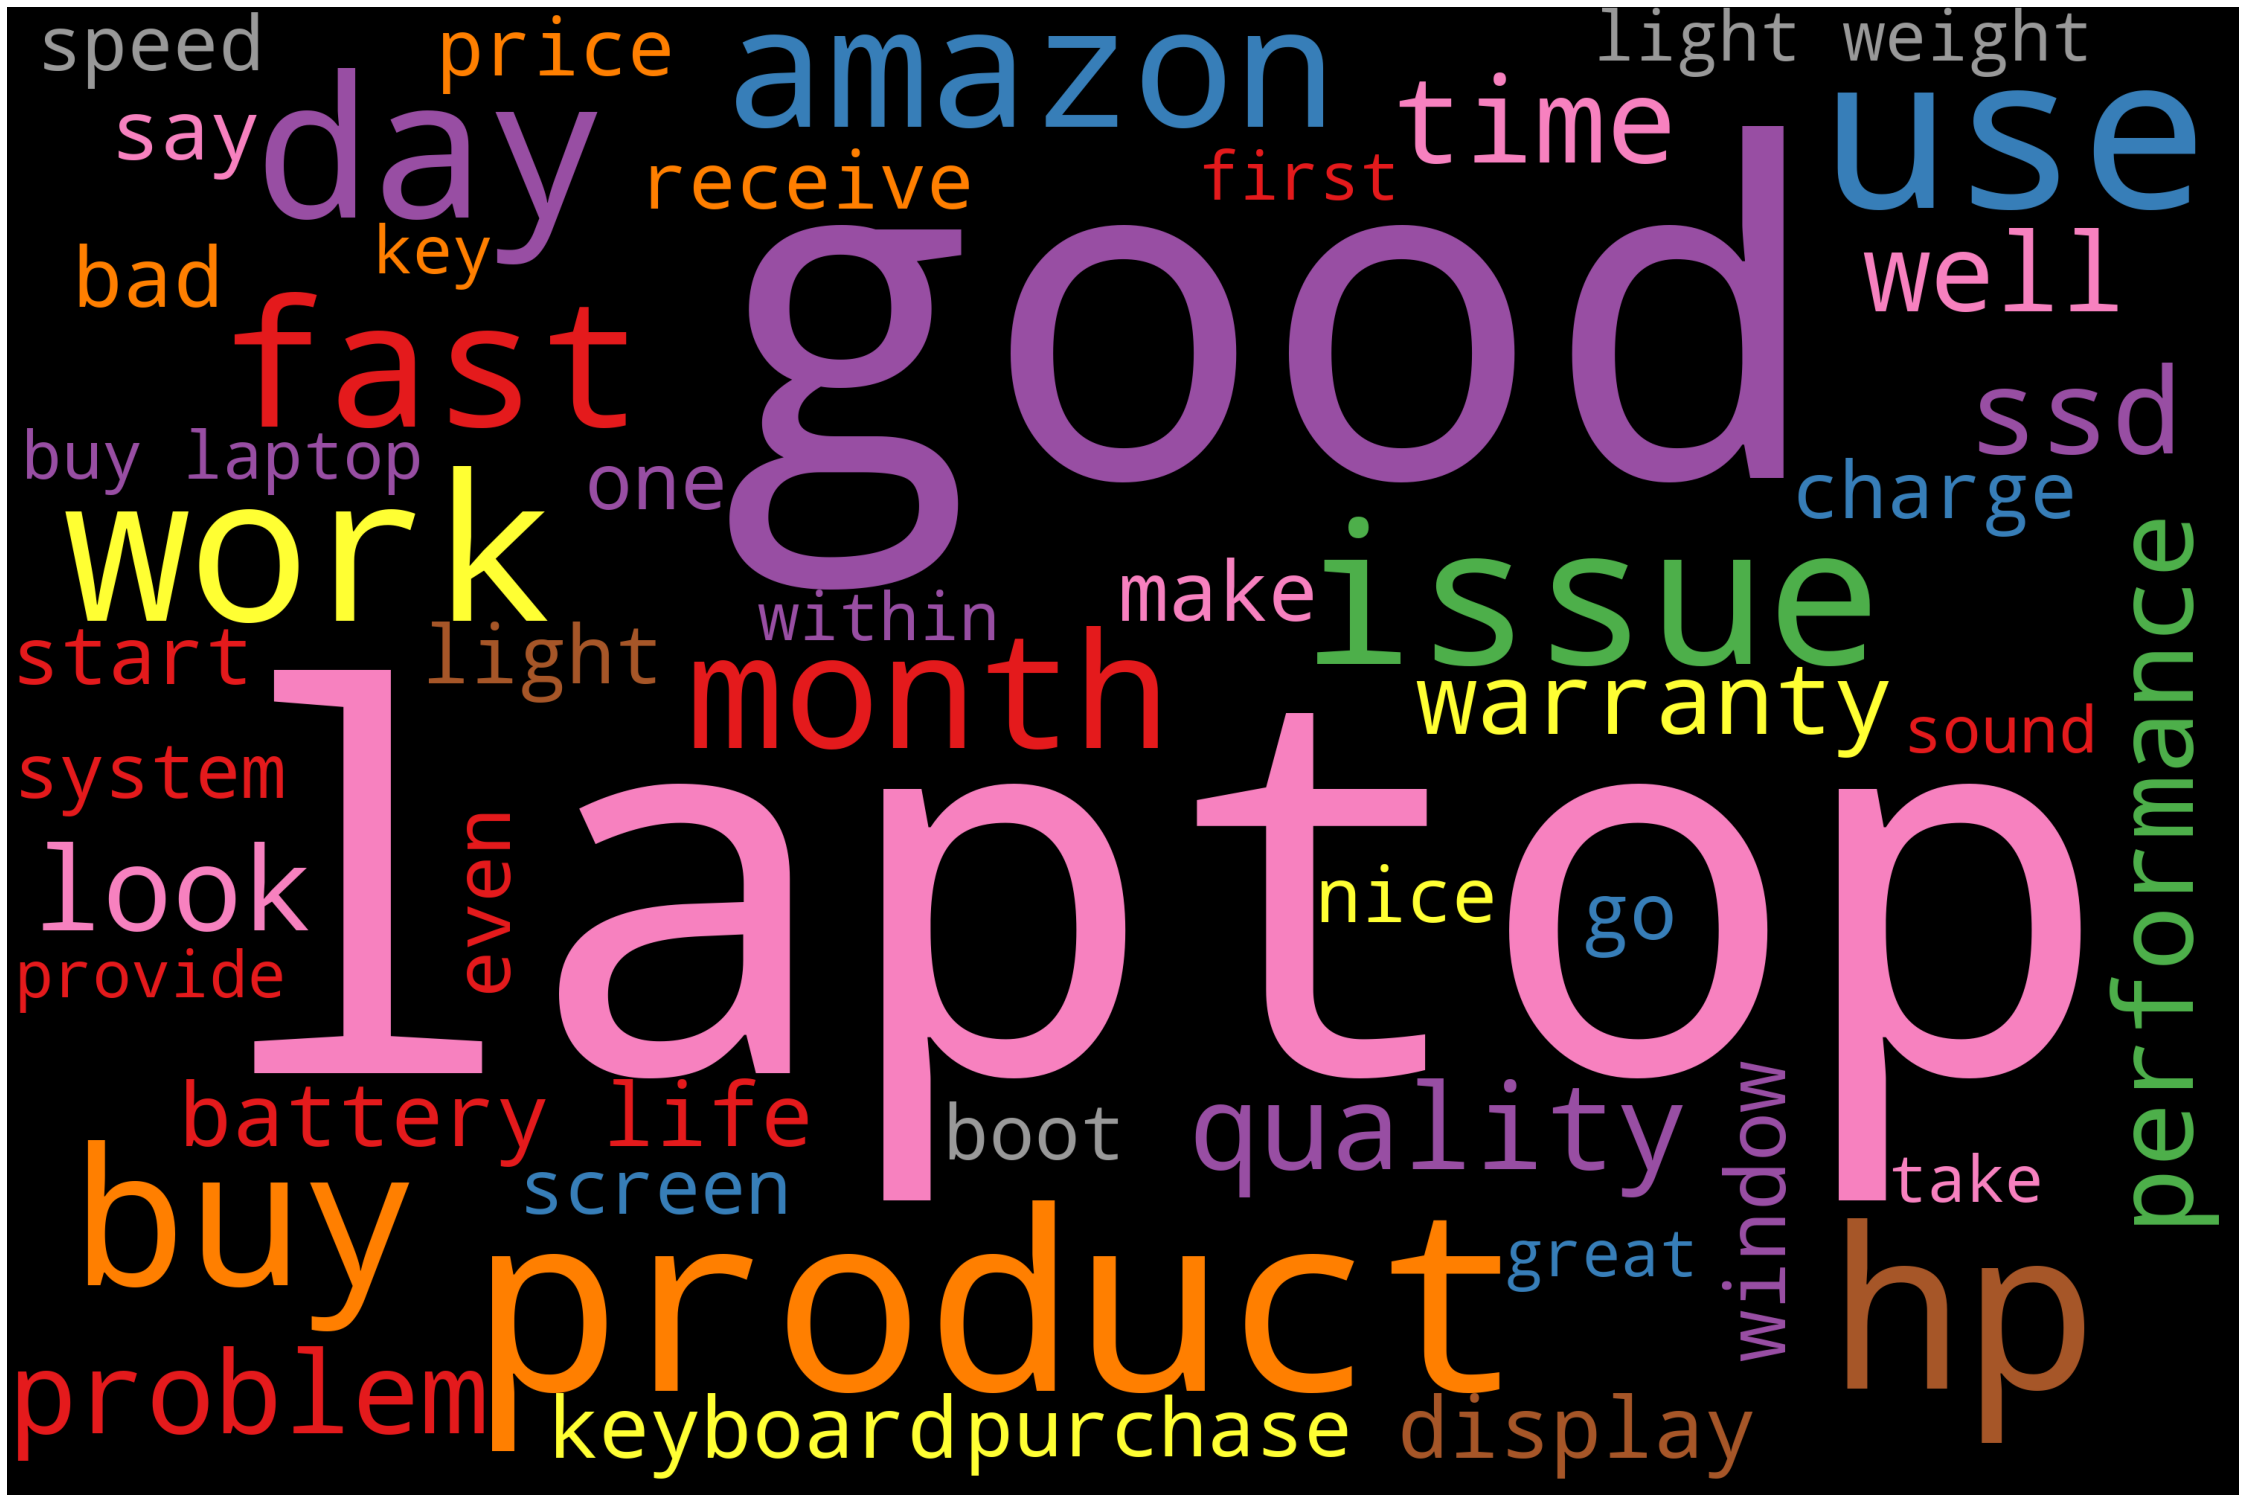

In [221]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)